In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reviews = pd.read_csv('data/reviews_cleaned.csv')
# ratings = pd.read_csv('data/ratings.csv')
# sales = pd.read_csv('data/sales_cleaned.csv')
# games = pd.read_csv('data/games_cleaned.csv')

# games_list.drop(columns = ['index', 'name', 'achievements.1'], inplace=True)
# games_list.columns = games_list.columns.str.lower().str.replace(' ', '_')
# games_list.to_csv('data/all_games_cleaned.csv', index=False)


all_games = pd.read_csv('data/all_games_cleaned.csv')
all_games.dtypes

name                           object
estimated_owners               object
price                         float64
windows                          bool
mac                              bool
linux                            bool
achievements                    int64
developers                     object
publishers                     object
categories                     object
genres                         object
tags                           object
single_player                    bool
release_year                    int64
players                        object
popular_tags                   object
recent_sentiment               object
recent_review_number          float64
recent_positive_percentage    float64
all_sentiment                  object
all_review_number             float64
all_positive_percentage       float64
global_sales                  float64
dtype: object

In [239]:
# Some Summary Functions
def game_summary(game_name):
    summary = all_games[all_games['name'] == game_name]
    return summary.loc[:, ['name', 'publishers', 'developers', 'all_sentiment', 'global_sales', 'release_year']]
# game_summary('Farming Simulator 17')


def get_sentiment(game_name):
    sentiment = all_games[all_games['name'] == game_name]
    return sentiment.loc[:, ['name', 'recent_sentiment', 'recent_review_number', 'recent_positive_percentage', 'all_sentiment', 'all_review_number', 'all_positive_percentage' ]]
# get_sentiment('Farming Simulator 17')

def get_sales_info(game_name):
    sale = all_games[all_games['name'] == game_name]
    return sale.loc[:, ['name', 'price', 'estimated_owners', 'global_sales', 'release_year']]
# get_sales_info('Farming Simulator 17')

def get_genre(game_name):
    genres = all_games[all_games['name'] == game_name]
    return genres.loc[:, ['name', 'achievements', 'single_player', 'categories', 'genres', 'tags', 'popular_tags']]
# get_genre('Farming Simulator 17')


def get_tags(game_name):
    game_tags = tags[tags['name'] == game_name]
    return game_tags.columns[game_tags.iloc[0] == 1].tolist()
# get_tags('Farming Simulator 17')

def get_comp_req(game_name):
    requirements = all_games[all_games['name'] == game_name]
    return requirements.loc[:, ['name', 'windows', 'mac', 'linux']]
get_comp_req('Farming Simulator 17')

,name,windows,mac,linux
39,Farming Simulator 17,True,True,False


In [ ]:
# analysis functions: 

# price vs sales
# publisher vs price
# developer vs price
# tags vs price (games with action tags vs price)
# single_player vs price vs sales

# ratings? --> metacritic score, user score , ALL SENTIMENT

# windows / mac / linux users ** requirements by sales?

# Next steps:
# just look at almost every metric by price, all sentiment, sales, and estimated users??

# make some multiple regression lines?
# price, sentiment, developer, publisher, tags(if they are in the most common),
# see if we can estimate another metric --> like sales?



# 2 functions in, return some data like correlation, etc
# plot function
# regression

# jake
# function --> variable by requirements + plot? (summary stats + plot)
# tags by other metrics

In [ ]:
# Make some visualizations
# like one we could use on the README page as an example of our custom functions

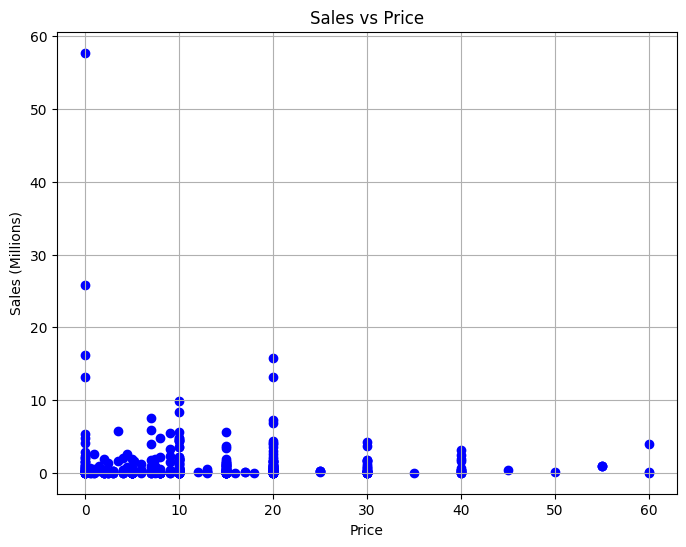

In [233]:
# Plotting sales and price
plt.figure(figsize=(8, 6))
plt.scatter(all_games['price'], all_games['global_sales'], color='blue', marker='o')
plt.title('Sales vs Price')
plt.xlabel('Price')
plt.ylabel('Sales (Millions)')
plt.grid(True)
plt.show()

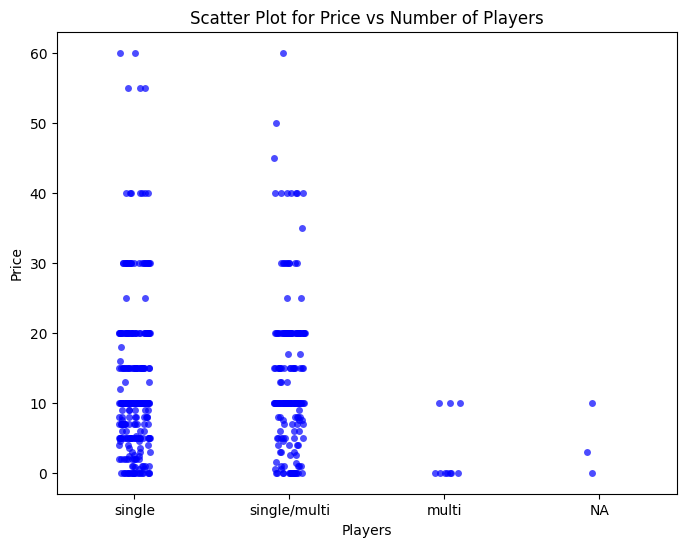

In [238]:
# Plotting players and price
plt.figure(figsize=(8, 6))
sns.stripplot(x='players', y='price', data=all_games, jitter=True, alpha=0.7, color='blue', marker='o')
plt.title('Scatter Plot for Price vs Number of Players')
plt.xlabel('Players')
plt.ylabel('Price')
plt.show()

In [ ]:
# specific functions to write:
# look for sequels? look for game titles that contain the same words? with numbers at the end?

# 

price_category           free  0-5  5-10  10-15  15-20  20-30  30-40  40-50  \
all_sentiment                                                                 
Mixed                      15    7    27     27      8     14      8      2   
Mostly Negative             2    1     1      2      1      0      0      0   
Mostly Positive            14    6    17     16      6     22      5      4   
Negative                    2    0     0      0      0      0      0      0   
Overwhelmingly Negative     1    0     0      0      0      0      0      0   
Overwhelmingly Positive     1    0     2     17      4      8      2      2   
Positive                    1    1     2      9      1      1      0      0   
Very Negative               0    0     0      1      0      0      0      0   
Very Positive               9   22    37     42     32     32     17      6   
All                        45   37    86    114     52     77     32     14   

price_category           50-60  60+  All  
all_sent

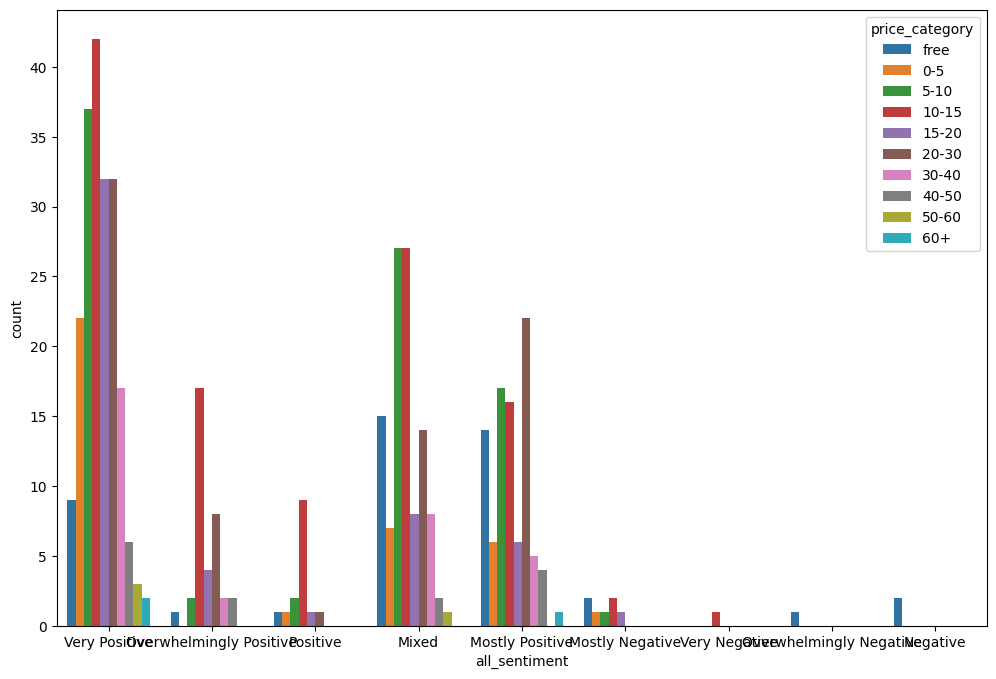

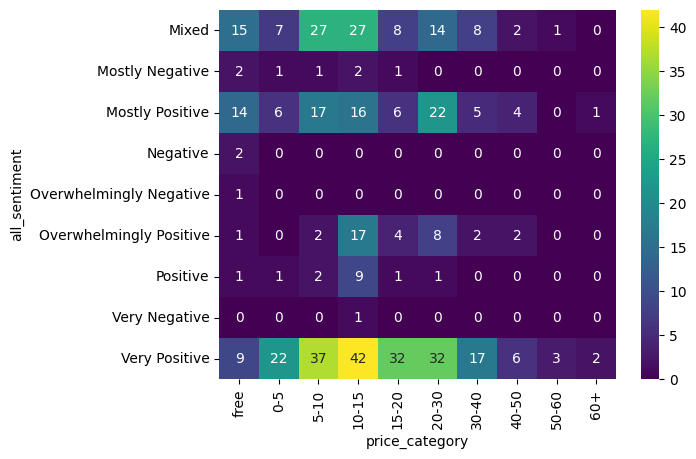

In [293]:
# 2 functions in, return some data like correlation, etc
# plot function
# regression



# function for taking in 2 vars, return analysis data from them

# include var for making a log transformation??

def analyze(col1, col2, col_types=('cont-cont'), plot=False):
    """
    Analyze the relationship between two columns in a DataFrame.

    Parameters
    ----------
    col1 : str
        The name of the first column.
    col2 : str
        The name of the second column.
    col_types : {'cont-cont', 'cont-cat', 'cat-cat'}, optional
        The types of the columns for analysis:
        - 'cont-cont': Continuous vs. Continuous
        - 'cont-cat': Continuous vs. Categorical
        - 'cat-cat': Categorical vs. Categorical
        Default is 'cont-cont'.
    plot : bool, optional
        If True, generate and display relevant plots based on the analysis.
        Default is False.

    Returns
    -------
    str or None
        If the analysis is not possible due to insufficient data, a message is returned.
        Otherwise, None is returned.

    Examples
    --------
    >>> analyze('price', 'global_sales', col_types='cont-cont', plot=True)
    The correlation coefficient is: 0.75
    The P value for the hypothesis test is: 0.02
    # (Output for other col_types)

    Notes
    -----
    - For 'cont-cat' analysis, certain metrics may not be meaningful for certain columns, like 'price'.
    - The function may return a message if the dataset has less than 15 values after dropping NA rows.
    """
        
    
    # drop all rows with NA values in these two columns
    columns = [col1, col2]
    df = all_games.dropna(subset=columns)
    df = df.loc[:, columns]
    
    # if the length of the df is now less than 20, it might be wrong to analyse the relationship?
    if (df.shape[0] < 15):
        return ("This relationship has less than 15 values to analyze")
    
    
    if (col_types == 'cont-cont'):
        from scipy.stats import pearsonr
        correlation_coef, p_value = pearsonr(df['price'], df['global_sales'])
        print(f'The correlation coefficient is: {correlation_coef}')
        print(f'The P value for the hypothesis test is: {p_value}')
        
        
    elif (col_types == 'cont-cat'):
        descriptive_stats = df.groupby(col2)[col1].describe()
        print(descriptive_stats)
    # this metric does not always make sense to use... like for price
        
    elif (col_types == 'cat-cat'):
        cross_tab = pd.crosstab(df[col1], df[col2], margins=True) #look at joint distribution table
        print(cross_tab)
    else:
        return ("Please input a valid value for col_types, such as cont-cont, cont-cat, or cat-cat")
    
    if (plot == True):
        graph(col1, col2, col_types)
    return
    

# analyze('price', 'developers')
# analyze('price', 'global_sales', 'cont-cont')
# analyze('price', 'developers', 'cont-cat')
# analyze('developers', 'linux', 'cat-cat')

# in testing.py --> write some functions to test these and see if they return the right things?

# what if we want to transform the data --> make the column before hand, pass that name through

    

def graph(col1, col2, col_types='cont-cont'):
    
    """
    Generate and display plots for the relationship between two columns in a DataFrame.

    Parameters
    ----------
    col1 : str
        The name of the first column.
    col2 : str
        The name of the second column.
    col_types : {'cont-cont', 'cont-cat', 'cat-cat'}, optional
        The types of the columns for analysis:
        - 'cont-cont': Continuous vs. Continuous
        - 'cont-cat': Continuous vs. Categorical
        - 'cat-cat': Categorical vs. Categorical
        Default is 'cont-cont'.

    Returns
    -------
    str or None
        If the analysis is not possible due to insufficient data, a message is returned.
        Otherwise, None is returned.

    Examples
    --------
    >>> graph('price', 'global_sales', col_types='cont-cont')
    # (Plots based on the col_types)

    Notes
    -----
    - The function may return a message if the dataset has less than 15 values after dropping NA rows.
    """
    
    
    columns = [col1, col2]
    df = all_games.dropna(subset=columns)
    df = df.loc[:, columns]
    
#     df[col1] = np.log(df[col1])
#     df[col2] = np.log(df[col2])
    
    # if the length of the df is now less than 20, it might be wrong to analyse the relationship?
    if (df.shape[0] < 15):
        return ("This relationship has less than 15 values to analyze")
    
    if (col_types == 'cont-cont'):
#         sns.scatterplot(x=col1, y=col2, data=df)
#         plt.show()
        
        plt.figure(figsize=(12, 8))
        sns.jointplot(x=col1, y=col2, data=df)
        plt.show()
        
        plt.figure(figsize=(12, 8))
        sns.pairplot(df)
        plt.show()
        
        plt.figure(figsize=(12, 8))
        sns.regplot(x=col1, y=col2, data=df)
        plt.show()
        
        
    elif (col_types == 'cont-cat'):
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=col2, y=col1, data=df)
        plt.show()
        
#         sns.violinplot(x=col2, y=col1, data=df)
#         plt.show()

        plt.figure(figsize=(12, 8))
        sns.barplot(x=col2, y=col1, data=df)
        plt.show()
        
#         sns.pointplot(x=col2, y=col1, data=df)
#         plt.show()
        
#         sns.swarmplot(x=col2, y=col1, data=df)
#         plt.show()
        plt.figure(figsize=(12, 8))
        sns.countplot(x=col2, data=df)
        plt.show()

#         g = sns.FacetGrid(df, col=col2)
#         g.map(sns.histplot, col1)
#         plt.show()
        
    elif (col_types == 'cat-cat'):
        plt.figure(figsize=(12, 8))
        sns.countplot(x=col1, hue=col2, data=df)
        plt.show()

        pivot_table = df.pivot_table(index=col1, columns=col2, aggfunc='size', fill_value=0)
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, cmap='viridis')
        plt.show()

#         sns.barplot(x=col1, y='count', hue=col2, data=df)
#         plt.show()

#         sns.barplot(x=col1, y='count', hue=col2, dodge=True, data=df)
#         plt.show()

#         from statsmodels.graphics.mosaicplot import mosaic
#         mosaic(df, [col1, col2])
#         plt.show()

#         g = sns.catplot(x=col1, col=col2, kind='count', data=df)
#         plt.show()

    else:
        return ("Please input a valid value for col_types, such as cont-cont, cont-cat, or cat-cat")
    return
    
    
    
    
    
# analyze('price', 'global_sales', 'cont-cont', True) 

# analyze('global_sales', 'price_category', 'cont-cat', True) 

analyze('all_sentiment', 'price_category', 'cat-cat', True) 





# could make price categgorical --> separate out into free, 0-5, 5-10, 10-15, 15-20, up to like 70???

In [264]:
all_games.dtypes

appid                           int64
name                           object
estimated_owners              float64
price                         float64
dlc_count                       int64
windows                          bool
mac                              bool
linux                            bool
metacritic_score                int64
user_score                      int64
achievements                    int64
recommendations                 int64
average_playtime_forever        int64
average_playtime_two_weeks      int64
median_playtime_forever         int64
median_playtime_two_weeks       int64
developers                     object
publishers                     object
genres                         object
tags                           object
single_player                    bool
release_year                    int32
players                        object
popular_tags                   object
recent_sentiment               object
recent_review_number          float64
recent_posit

In [279]:
# all_games['price_rounded'] = all_games['price'].round()
# bins = [0, .01, 5, 10, 15, 20, 30, 40, 50, 60, float('inf')] 
# labels = ['free', '0-5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50-60', '60+'] 
# all_games['price_category'] = pd.cut(all_games['price_rounded'], bins=bins, labels=labels, right=False)

# all_games

,appid,name,estimated_owners,price,dlc_count,windows,mac,linux,metacritic_score,user_score,...,popular_tags,recent_sentiment,recent_review_number,recent_positive_percentage,all_sentiment,all_review_number,all_positive_percentage,global_sales,price_category,price_rounded
0,12140,Max Payne,750000.0,3.0,0,True,False,False,89,0,...,"Noir,Action,Classic,Third-Person Shooter,Bulle...",Very Positive,27.0,81.0,Very Positive,3348.0,89.0,5.80,0-5,3.0
1,748490,The Legend of Heroes: Trails of Cold Steel II,75000.0,40.0,13,True,False,False,81,0,...,"JRPG,RPG,Anime,Story Rich,Great Soundtrack,Tur...",Very Positive,11.0,81.0,Overwhelmingly Positive,852.0,95.0,0.39,40-50,40.0
2,16130,Fish Tycoon,10000.0,10.0,0,True,False,False,0,0,...,"Casual,Simulation,Management",NaN,NaN,NaN,Positive,37.0,81.0,0.26,10-15,10.0
3,40800,Super Meat Boy,3500000.0,15.0,1,True,True,True,87,0,...,"Platformer,Difficult,Indie,2D,Singleplayer,Gre...",Very Positive,67.0,89.0,Very Positive,18040.0,94.0,0.01,15-20,15.0
4,211200,Beyond Oasis,0.0,1.0,0,True,True,True,0,0,...,"Action,Classic,RPG,Adventure",NaN,NaN,NaN,NaN,NaN,NaN,0.05,0-5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,394230,Battleborn,1500000.0,0.0,0,True,False,False,69,0,...,"FPS,Action,Multiplayer,MOBA,Shooter,Co-op,Free...",Mixed,28.0,64.0,Mixed,9208.0,61.0,0.72,free,0.0
486,255220,GRID Autosport,750000.0,0.0,0,True,True,True,78,0,...,"Racing,Sports,Simulation,Driving,Multiplayer,A...",Mixed,33.0,60.0,Mostly Positive,3903.0,74.0,0.29,free,0.0
487,224600,Defiance,3500000.0,0.0,0,True,False,False,64,0,...,"Free to Play,Action,Open World,Massively Multi...",Mixed,60.0,68.0,Mostly Positive,12008.0,76.0,1.13,free,0.0
488,24740,Burnout Paradise: The Ultimate Box,1500000.0,0.0,0,True,False,False,87,0,...,"Racing,Open World,Multiplayer,Destruction,Grea...",Very Positive,35.0,88.0,Very Positive,7240.0,87.0,0.19,free,0.0


In [296]:
import statsmodels.api as sm

def multiple_regression(X, y):
    """
    Perform multiple linear regression.

    Parameters
    ----------
    X : pandas.DataFrame
        The independent variables (features) in a DataFrame.
    y : pandas.Series
        The dependent variable (target) in a Series.

    Returns
    -------
    statsmodels.regression.linear_model.RegressionResults
        The results of the linear regression.

    Notes
    -----
    The input DataFrame `X` should contain the independent variables,
    and the Series `y` should contain the dependent variable.
    """
    # Add a constant term to the independent variables matrix
    X_with_const = sm.add_constant(X)

    # Fit the multiple linear regression model
    model = sm.OLS(y, X_with_const).fit()

    # Print the summary (optional)
    print(model.summary())

    return model

# Example usage:
# Assuming you have a DataFrame `df` with columns 'feature1', 'feature2', and 'target'
# where 'target' is the dependent variable, and you want to predict 'target' based on 'feature1' and 'feature2'
# result = multiple_regression(df[['feature1', 'feature2']], df['target'])

multiple_regression(all_games[['global_sales', 'all_sentiment', 'players', 'metacritic_score', 'user_score', 'release_year', 'publishers', 'developers']], all_games['price_rounded'])


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [294]:
all_games.dtypes

appid                            int64
name                            object
estimated_owners               float64
price                          float64
dlc_count                        int64
windows                           bool
mac                               bool
linux                             bool
metacritic_score                 int64
user_score                       int64
achievements                     int64
recommendations                  int64
average_playtime_forever         int64
average_playtime_two_weeks       int64
median_playtime_forever          int64
median_playtime_two_weeks        int64
developers                      object
publishers                      object
genres                          object
tags                            object
single_player                     bool
release_year                     int32
players                         object
popular_tags                    object
recent_sentiment                object
recent_review_number     

In [ ]:
# Questions:

'''
which producers/developers have the highest priced games, highest reviewed, most sales

do single player games sell more than multiplayer games? rate better?

what is the average price of an action game

what is the average number of achievements for nonzero games




'''